# Imports

In [52]:
import yfinance as yf
import pandas as pd
import numpy as np
import re
from datetime import date as date
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import matplotlib.pyplot as plt
import json
from dotenv import load_dotenv
import os

# Retrieving Data from CoinMarketCap API

In [53]:
# CoinMarketCap API_KEY
load_dotenv()
API_KEY = os.getenv("API_KEY")

In [3]:
crypto_ids_url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/map'
parameters = {
    'limit': '50',
}
headers = {
    'Accepts': 'application/json',
    'Accept-Encoding': 'deflate, gzip',
    'X-CMC_PRO_API_KEY': API_KEY,
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(crypto_ids_url, params=parameters)
    data = json.loads(response.text)
    print(json.dumps(data, indent=4))
    session.close()
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
    session.close()

{
    "status": {
        "timestamp": "2025-08-27T15:35:00.394Z",
        "error_code": 1002,
        "error_message": "API key missing.",
        "elapsed": 0,
        "credit_count": 0
    }
}


In [4]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
parameters = {
    'id': '4642',
    'convert': 'USD'
}
headers = {
    'Accepts': 'application/json',
    'Accept-Encoding': 'deflate, gzip',
    'X-CMC_PRO_API_KEY': API_KEY
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters, headers=headers)
    data = json.loads(response.text)
    print(json.dumps(data, indent=4))
    session.close()
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
    session.close()

{
    "status": {
        "timestamp": "2025-08-27T15:35:00.914Z",
        "error_code": 1002,
        "error_message": "API key missing.",
        "elapsed": 0,
        "credit_count": 0
    }
}


# Retrieving Data from Yahoo Finance

In [5]:
start_date = '2019-09-18'
end_date = date.today()
symbol = 'HBAR-USD'
yf_data = yf.download(symbol, start_date, end_date)

/var/folders/w0/r_yxdfkd6wx0cy34j1zwsk8w0000gn/T/ipykernel_28830/1161879405.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf_data = yf.download(symbol, start_date, end_date)
[*********************100%***********************]  1 of 1 completed


In [6]:
print(yf_data)

Price          Close      High       Low      Open     Volume
Ticker      HBAR-USD  HBAR-USD  HBAR-USD  HBAR-USD   HBAR-USD
Date                                                         
2019-09-18  0.086921  0.100272  0.080045  0.090519   14772274
2019-09-19  0.057924  0.087721  0.054469  0.087702   27324784
2019-09-20  0.052490  0.059061  0.047800  0.058087   15814443
2019-09-21  0.048021  0.055408  0.045456  0.052402   13144171
2019-09-22  0.039735  0.048237  0.038757  0.048065   10549578
...              ...       ...       ...       ...        ...
2025-08-22  0.256798  0.258489  0.228321  0.235460  487225992
2025-08-23  0.253186  0.256893  0.246880  0.256804  236904300
2025-08-24  0.247875  0.259885  0.243197  0.253187  347292778
2025-08-25  0.231100  0.250431  0.227393  0.247896  386757274
2025-08-26  0.241742  0.244944  0.230274  0.231080  316854613

[2170 rows x 5 columns]


In [7]:
yf_data.head()

Price,Close,High,Low,Open,Volume
Ticker,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD
Date,,,,,
2019-09-18,0.086921,0.100272,0.080045,0.090519,14772274
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578


In [8]:
yf_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD
Date,,,,,
2025-08-22,0.256798,0.258489,0.228321,0.235460,487225992
2025-08-23,0.253186,0.256893,0.246880,0.256804,236904300
2025-08-24,0.247875,0.259885,0.243197,0.253187,347292778
2025-08-25,0.231100,0.250431,0.227393,0.247896,386757274
2025-08-26,0.241742,0.244944,0.230274,0.231080,316854613


In [9]:
yf_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD
count,2170.000000,2170.000000,2170.000000,2170.000000,2.170000e+03
mean,0.121556,0.127237,0.115859,0.121529,1.566200e+08
std,0.102106,0.108145,0.096414,0.102143,3.467599e+08
min,0.010080,0.010667,0.010012,0.010054,4.019320e+05
25%,0.048186,0.049292,0.046690,0.048189,2.260959e+07
50%,0.069354,0.072105,0.066940,0.069364,5.289684e+07
75%,0.192546,0.198249,0.184829,0.192279,1.545186e+08
max,0.505923,0.570146,0.462120,0.505475,6.950736e+09


In [10]:
yf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2170 entries, 2019-09-18 to 2025-08-26
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, HBAR-USD)   2170 non-null   float64
 1   (High, HBAR-USD)    2170 non-null   float64
 2   (Low, HBAR-USD)     2170 non-null   float64
 3   (Open, HBAR-USD)    2170 non-null   float64
 4   (Volume, HBAR-USD)  2170 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 101.7 KB


In [11]:
def unify_column_names(name: str) -> any:
    """Converts column names to lowercase, replaces spaces/hyphens with underscores, and handles MultiIndex."""
    if isinstance(name, tuple):  # Handle MultiIndex columns
        return tuple(re.sub(r'[-\s]+', '_', n).lower() if isinstance(n, str) else n for n in name)
    return re.sub(r'[-\s]+', '_', name).lower() if isinstance(name, str) else name


# Apply transformation to column names
yf_data.columns = yf_data.columns.map(unify_column_names)

In [12]:
print(f"Unified columns names: \n{yf_data.columns}")

Unified columns names: 
MultiIndex([( 'close', 'hbar_usd'),
            (  'high', 'hbar_usd'),
            (   'low', 'hbar_usd'),
            (  'open', 'hbar_usd'),
            ('volume', 'hbar_usd')],
           names=['Price', 'Ticker'])


# Working with Returns

In [13]:
# Add a column
yf_data['returns'] = yf_data['close'].pct_change()
yf_data

Price,close,high,low,open,volume,returns
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,
Date,,,,,,
2019-09-18,0.086921,0.100272,0.080045,0.090519,14772274,NaN
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,-0.333602
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,-0.093813
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,-0.085140
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,-0.172549
...,...,...,...,...,...,...
2025-08-22,0.256798,0.258489,0.228321,0.235460,487225992,0.090613
2025-08-23,0.253186,0.256893,0.246880,0.256804,236904300,-0.014066


In [14]:
# Calculate Log Returns
yf_data['log_returns'] = np.log(yf_data['close'] / yf_data['close'].shift(1))
yf_data

Price,close,high,low,open,volume,returns,log_returns
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,
Date,,,,,,,
2019-09-18,0.086921,0.100272,0.080045,0.090519,14772274,NaN,NaN
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,-0.333602,-0.405868
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,-0.093813,-0.098509
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,-0.085140,-0.088984
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,-0.172549,-0.189406
...,...,...,...,...,...,...,...
2025-08-22,0.256798,0.258489,0.228321,0.235460,487225992,0.090613,0.086740
2025-08-23,0.253186,0.256893,0.246880,0.256804,236904300,-0.014066,-0.014165


In [15]:
# Drop NA values
yf_data.dropna(inplace=True)
yf_data

Price,close,high,low,open,volume,returns,log_returns
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,
Date,,,,,,,
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,-0.333602,-0.405868
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,-0.093813,-0.098509
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,-0.085140,-0.088984
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,-0.172549,-0.189406
2019-09-23,0.037645,0.039803,0.035488,0.039739,11214860,-0.052598,-0.054032
...,...,...,...,...,...,...,...
2025-08-22,0.256798,0.258489,0.228321,0.235460,487225992,0.090613,0.086740
2025-08-23,0.253186,0.256893,0.246880,0.256804,236904300,-0.014066,-0.014165


In [16]:
# Cumulative Sum of Log Returns
yf_data['log_returns_cum_sum'] = yf_data['log_returns'].cumsum()
yf_data

Price,close,high,low,open,volume,returns,log_returns,log_returns_cum_sum
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,
Date,,,,,,,,
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,-0.333602,-0.405868,-0.405868
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,-0.093813,-0.098509,-0.504377
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,-0.085140,-0.088984,-0.593361
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,-0.172549,-0.189406,-0.782767
2019-09-23,0.037645,0.039803,0.035488,0.039739,11214860,-0.052598,-0.054032,-0.836799
...,...,...,...,...,...,...,...,...
2025-08-22,0.256798,0.258489,0.228321,0.235460,487225992,0.090613,0.086740,1.083290
2025-08-23,0.253186,0.256893,0.246880,0.256804,236904300,-0.014066,-0.014165,1.069125


In [17]:
# Normalize Log Returns
yf_data['normal_returns'] = np.exp(yf_data['log_returns_cum_sum']) - 1
yf_data

Price,close,high,low,open,volume,returns,log_returns,log_returns_cum_sum,normal_returns
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,
Date,,,,,,,,,
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,-0.333602,-0.405868,-0.405868,-0.333602
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,-0.093813,-0.098509,-0.504377,-0.396118
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,-0.085140,-0.088984,-0.593361,-0.447533
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,-0.172549,-0.189406,-0.782767,-0.542861
2019-09-23,0.037645,0.039803,0.035488,0.039739,11214860,-0.052598,-0.054032,-0.836799,-0.566906
...,...,...,...,...,...,...,...,...,...
2025-08-22,0.256798,0.258489,0.228321,0.235460,487225992,0.090613,0.086740,1.083290,1.954384
2025-08-23,0.253186,0.256893,0.246880,0.256804,236904300,-0.014066,-0.014165,1.069125,1.912829


In [18]:
# Fill NA values
yf_data.fillna(0, inplace=True)
yf_data

Price,close,high,low,open,volume,returns,log_returns,log_returns_cum_sum,normal_returns
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,
Date,,,,,,,,,
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,-0.333602,-0.405868,-0.405868,-0.333602
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,-0.093813,-0.098509,-0.504377,-0.396118
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,-0.085140,-0.088984,-0.593361,-0.447533
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,-0.172549,-0.189406,-0.782767,-0.542861
2019-09-23,0.037645,0.039803,0.035488,0.039739,11214860,-0.052598,-0.054032,-0.836799,-0.566906
...,...,...,...,...,...,...,...,...,...
2025-08-22,0.256798,0.258489,0.228321,0.235460,487225992,0.090613,0.086740,1.083290,1.954384
2025-08-23,0.253186,0.256893,0.246880,0.256804,236904300,-0.014066,-0.014165,1.069125,1.912829


# Structure Conditions and Iterations
 

In [19]:
# Create a new copy of yf_data
yf_data_new = yf_data.copy()
print(yf_data_new)

Price          close      high       low      open     volume   returns  \
Ticker      hbar_usd  hbar_usd  hbar_usd  hbar_usd   hbar_usd             
Date                                                                      
2019-09-19  0.057924  0.087721  0.054469  0.087702   27324784 -0.333602   
2019-09-20  0.052490  0.059061  0.047800  0.058087   15814443 -0.093813   
2019-09-21  0.048021  0.055408  0.045456  0.052402   13144171 -0.085140   
2019-09-22  0.039735  0.048237  0.038757  0.048065   10549578 -0.172549   
2019-09-23  0.037645  0.039803  0.035488  0.039739   11214860 -0.052598   
...              ...       ...       ...       ...        ...       ...   
2025-08-22  0.256798  0.258489  0.228321  0.235460  487225992  0.090613   
2025-08-23  0.253186  0.256893  0.246880  0.256804  236904300 -0.014066   
2025-08-24  0.247875  0.259885  0.243197  0.253187  347292778 -0.020977   
2025-08-25  0.231100  0.250431  0.227393  0.247896  386757274 -0.067675   
2025-08-26  0.241742  0.2

In [20]:
# Work with certain rows and columns using iloc
yf_data_new.iloc[1:3, 0:]

Price,close,high,low,open,volume,returns,log_returns,log_returns_cum_sum,normal_returns
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,
Date,,,,,,,,,
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,-0.093813,-0.098509,-0.504377,-0.396118
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,-0.085140,-0.088984,-0.593361,-0.447533


# Conditionals

In [21]:
# Add conditional statement
yf_data_new.loc[yf_data['close']['hbar_usd'].shift(-1) > yf_data['close']['hbar_usd'], 'target'] = 1
yf_data_new.loc[yf_data['close']['hbar_usd'].shift(-1) <= yf_data['close']['hbar_usd'], 'target'] = -1
yf_data_new

Price,close,high,low,open,volume,returns,log_returns,log_returns_cum_sum,normal_returns,target
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,,
Date,,,,,,,,,,
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,-0.333602,-0.405868,-0.405868,-0.333602,-1.0
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,-0.093813,-0.098509,-0.504377,-0.396118,-1.0
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,-0.085140,-0.088984,-0.593361,-0.447533,-1.0
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,-0.172549,-0.189406,-0.782767,-0.542861,-1.0
2019-09-23,0.037645,0.039803,0.035488,0.039739,11214860,-0.052598,-0.054032,-0.836799,-0.566906,-1.0
...,...,...,...,...,...,...,...,...,...,...
2025-08-22,0.256798,0.258489,0.228321,0.235460,487225992,0.090613,0.086740,1.083290,1.954384,-1.0
2025-08-23,0.253186,0.256893,0.246880,0.256804,236904300,-0.014066,-0.014165,1.069125,1.912829,-1.0


# Iterations

In [22]:
# Iterate over data frame
i = 0
for index, row in yf_data_new.iterrows():
    print(index, row['close'], row['target'])
    if i >= 4:
        break
    i += 1

2019-09-19 00:00:00 Ticker
hbar_usd    0.057924
Name: 2019-09-19 00:00:00, dtype: float64 Ticker
   -1.0
Name: 2019-09-19 00:00:00, dtype: float64
2019-09-20 00:00:00 Ticker
hbar_usd    0.05249
Name: 2019-09-20 00:00:00, dtype: float64 Ticker
   -1.0
Name: 2019-09-20 00:00:00, dtype: float64
2019-09-21 00:00:00 Ticker
hbar_usd    0.048021
Name: 2019-09-21 00:00:00, dtype: float64 Ticker
   -1.0
Name: 2019-09-21 00:00:00, dtype: float64
2019-09-22 00:00:00 Ticker
hbar_usd    0.039735
Name: 2019-09-22 00:00:00, dtype: float64 Ticker
   -1.0
Name: 2019-09-22 00:00:00, dtype: float64
2019-09-23 00:00:00 Ticker
hbar_usd    0.037645
Name: 2019-09-23 00:00:00, dtype: float64 Ticker
   -1.0
Name: 2019-09-23 00:00:00, dtype: float64


# Value Extraction, Multiple Adjustments, Save and Load

In [23]:
# Extract close prices
yf_data_extract = yf_data_new.copy()
close_prices = yf_data_extract['close'].values
close_prices

array([[0.057924  ],
       [0.05249   ],
       [0.048021  ],
       ...,
       [0.24787501],
       [0.23109999],
       [0.241742  ]])

In [24]:
# Convert to a python list
close_prices_list = close_prices.tolist()
print(close_prices_list)

[[0.057923998683691025], [0.0524899996817112], [0.04802099987864494], [0.03973500058054924], [0.03764500096440315], [0.02964100055396557], [0.030201999470591545], [0.02896600030362606], [0.036991000175476074], [0.039928000420331955], [0.03577600046992302], [0.03802099823951721], [0.03849099949002266], [0.037578001618385315], [0.037682000547647476], [0.038763001561164856], [0.04189400002360344], [0.0384100005030632], [0.03817800059914589], [0.038802001625299454], [0.039021000266075134], [0.038339998573064804], [0.03606399893760681], [0.034988000988960266], [0.03310900181531906], [0.03734799847006798], [0.03782900050282478], [0.03763100132346153], [0.035071998834609985], [0.033872999250888824], [0.0335640013217926], [0.03282599896192551], [0.033215999603271484], [0.0315530002117157], [0.028082000091671944], [0.028931999579072], [0.03068700060248375], [0.030737999826669693], [0.0316849984228611], [0.0317160002887249], [0.03396200016140938], [0.0327799990773201], [0.03336700052022934], [0.

In [25]:
# Get just one item from data frame
price = yf_data_extract['close']['hbar_usd'].iloc[1:2].item()
price

0.0524899996817112

In [26]:
# Multiple Adjustments
yf_data_extract[['open', 'close', 'volume']] = yf_data_extract[['open', 'close', 'volume']] / yf_data_extract[
    ['open', 'close', 'volume']].max()
yf_data_extract.head()

Price,close,high,low,open,volume,returns,log_returns,log_returns_cum_sum,normal_returns,target
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,,
Date,,,,,,,,,,
2019-09-19,0.114492,0.087721,0.054469,0.173504,0.003931,-0.333602,-0.405868,-0.405868,-0.333602,-1.0
2019-09-20,0.103751,0.059061,0.047800,0.114916,0.002275,-0.093813,-0.098509,-0.504377,-0.396118,-1.0
2019-09-21,0.094918,0.055408,0.045456,0.103669,0.001891,-0.085140,-0.088984,-0.593361,-0.447533,-1.0
2019-09-22,0.078540,0.048237,0.038757,0.095089,0.001518,-0.172549,-0.189406,-0.782767,-0.542861,-1.0
2019-09-23,0.074409,0.039803,0.035488,0.078617,0.001613,-0.052598,-0.054032,-0.836799,-0.566906,-1.0


# Create Series and DataFrame

In [27]:
# Create a Series
list_1 = [1, 3, 8, 4, 3]
series_1 = pd.Series(list_1)
series_1

0    1
1    3
2    8
3    4
4    3
dtype: int64

In [28]:
# Create a DataFrame
df = pd.DataFrame(series_1, columns=['Series'])
df

,Series
0,1
1,3
2,8
3,4
4,3


# Save and Load DataFrame

In [29]:
# Save DataFrame
# yf_data_extract.to_csv('test.csv')

In [30]:
# Load DataFrame
# df_test = pd.read_csv('test.csv')
# df_test.head()

# Data Extraction

In [31]:
hbar_yf_data = yf.download(symbol, start_date, end_date)

/var/folders/w0/r_yxdfkd6wx0cy34j1zwsk8w0000gn/T/ipykernel_28830/4085836040.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hbar_yf_data = yf.download(symbol, start_date, end_date)
[*********************100%***********************]  1 of 1 completed


In [32]:
hbar_yf_data.head()

Price,Close,High,Low,Open,Volume
Ticker,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD,HBAR-USD
Date,,,,,
2019-09-18,0.086921,0.100272,0.080045,0.090519,14772274
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578


In [33]:
hbar_yf_data.columns = hbar_yf_data.columns.map(unify_column_names)

In [34]:
hbar_yf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2170 entries, 2019-09-18 to 2025-08-26
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (close, hbar_usd)   2170 non-null   float64
 1   (high, hbar_usd)    2170 non-null   float64
 2   (low, hbar_usd)     2170 non-null   float64
 3   (open, hbar_usd)    2170 non-null   float64
 4   (volume, hbar_usd)  2170 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 101.7 KB


# Feature Adjustments

In [35]:
# Add moving averages
hbar_yf_data["ma_12"] = hbar_yf_data["close"].rolling(12).mean()
hbar_yf_data["ma_21"] = hbar_yf_data["close"].rolling(21).mean()
hbar_yf_data.loc[hbar_yf_data["ma_12"] > hbar_yf_data["ma_21"], "signal"] = 1
hbar_yf_data.loc[hbar_yf_data["ma_12"] <= hbar_yf_data["ma_21"], "signal"] = 0
hbar_yf_data["signal"] = hbar_yf_data["signal"].shift(1)

In [36]:
hbar_yf_data.head(40)

Price,close,high,low,open,volume,ma_12,ma_21,signal
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,
Date,,,,,,,,
2019-09-18,0.086921,0.100272,0.080045,0.090519,14772274,NaN,NaN,NaN
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,NaN,NaN,NaN
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,NaN,NaN,NaN
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,NaN,NaN,NaN
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,NaN,NaN,NaN
2019-09-23,0.037645,0.039803,0.035488,0.039739,11214860,NaN,NaN,NaN
2019-09-24,0.029641,0.043997,0.029084,0.037689,12197101,NaN,NaN,NaN
2019-09-25,0.030202,0.031111,0.025871,0.029515,8906428,NaN,NaN,NaN


In [37]:
# Add returns
hbar_yf_data["log_returns_benchmark"] = np.log(hbar_yf_data["close"] / hbar_yf_data["close"].shift(1))
hbar_yf_data["log_returns_prod_benchmark"] = hbar_yf_data["log_returns_benchmark"].cumsum()
hbar_yf_data["prod_benchmark"] = np.exp(hbar_yf_data["log_returns_prod_benchmark"]) - 1

In [38]:
hbar_yf_data.head(40)

Price,close,high,low,open,volume,ma_12,ma_21,signal,log_returns_benchmark,log_returns_prod_benchmark,prod_benchmark
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,,,
Date,,,,,,,,,,,
2019-09-18,0.086921,0.100272,0.080045,0.090519,14772274,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-19,0.057924,0.087721,0.054469,0.087702,27324784,NaN,NaN,NaN,-0.405868,-0.405868,-0.333602
2019-09-20,0.052490,0.059061,0.047800,0.058087,15814443,NaN,NaN,NaN,-0.098509,-0.504377,-0.396118
2019-09-21,0.048021,0.055408,0.045456,0.052402,13144171,NaN,NaN,NaN,-0.088984,-0.593361,-0.447533
2019-09-22,0.039735,0.048237,0.038757,0.048065,10549578,NaN,NaN,NaN,-0.189406,-0.782767,-0.542861
2019-09-23,0.037645,0.039803,0.035488,0.039739,11214860,NaN,NaN,NaN,-0.054032,-0.836799,-0.566906
2019-09-24,0.029641,0.043997,0.029084,0.037689,12197101,NaN,NaN,NaN,-0.239042,-1.075841,-0.658989
2019-09-25,0.030202,0.031111,0.025871,0.029515,8906428,NaN,NaN,NaN,0.018750,-1.057092,-0.652535


In [39]:
# Add strategy returns
hbar_yf_data["log_returns_strategy"] = np.log(hbar_yf_data["open"].shift(-1) / hbar_yf_data["open"]).squeeze() * hbar_yf_data["signal"]
hbar_yf_data["log_returns_prod_strategy"] = hbar_yf_data["log_returns_strategy"].cumsum()
hbar_yf_data["prod_strategy"] = np.exp(hbar_yf_data["log_returns_prod_strategy"]) - 1
hbar_yf_data.tail(20)

Price,close,high,low,open,volume,ma_12,ma_21,signal,log_returns_benchmark,log_returns_prod_benchmark,prod_benchmark,log_returns_strategy,log_returns_prod_strategy,prod_strategy
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,,,,,,
Date,,,,,,,,,,,,,,
2025-08-07,0.259556,0.260311,0.241807,0.244749,384929805,0.254035,0.257842,0.0,0.058739,1.093973,1.986114,0.000000,3.716645,40.126201
2025-08-08,0.261925,0.267086,0.254957,0.259556,489818177,0.251561,0.257965,0.0,0.009086,1.103059,2.013369,0.000000,3.716645,40.126201
2025-08-09,0.266259,0.269601,0.261012,0.261920,351891322,0.251183,0.257918,0.0,0.016411,1.119470,2.063230,0.000000,3.716645,40.126201
2025-08-10,0.259365,0.271377,0.255243,0.266254,299920153,0.250818,0.257339,0.0,-0.026233,1.093237,1.983916,-0.000000,3.716645,40.126201
2025-08-11,0.247020,0.269598,0.243588,0.259365,407627229,0.250093,0.256183,0.0,-0.048767,1.044470,1.841891,-0.000000,3.716645,40.126201
2025-08-12,0.260637,0.263878,0.245153,0.247020,385553105,0.250867,0.255500,0.0,0.053659,1.098129,1.998550,0.000000,3.716645,40.126201
2025-08-13,0.266492,0.267515,0.256119,0.260637,460912050,0.252888,0.256512,0.0,0.022216,1.120345,2.065911,0.000000,3.716645,40.126201
2025-08-14,0.248642,0.275999,0.244458,0.266492,655801661,0.254431,0.256973,0.0,-0.069330,1.051014,1.860552,-0.000000,3.716645,40.126201


In [40]:
# Remove NaN's
hbar_yf_data.dropna(inplace=True)

In [41]:
# Review DataFrame
print(f"DataFrame Length: {len(hbar_yf_data)}")
hbar_yf_data

DataFrame Length: 2148


Price,close,high,low,open,volume,ma_12,ma_21,signal,log_returns_benchmark,log_returns_prod_benchmark,prod_benchmark,log_returns_strategy,log_returns_prod_strategy,prod_strategy
Ticker,hbar_usd,hbar_usd,hbar_usd,hbar_usd,hbar_usd,,,,,,,,,
Date,,,,,,,,,,,,,,
2019-10-09,0.039021,0.039741,0.038298,0.038765,4648692,0.038545,0.039246,0.0,0.005628,-0.800900,-0.551075,0.000000,0.000000,0.000000
2019-10-10,0.038340,0.039014,0.036855,0.038997,3263875,0.038413,0.038313,0.0,-0.017606,-0.818506,-0.558910,-0.000000,0.000000,0.000000
2019-10-11,0.036064,0.038311,0.035473,0.038224,3022574,0.038437,0.037531,1.0,-0.061199,-0.879705,-0.585095,-0.057420,-0.057420,-0.055803
2019-10-12,0.034988,0.036262,0.034779,0.036091,2184305,0.038184,0.036910,1.0,-0.030290,-0.909994,-0.597474,-0.030296,-0.087716,-0.083979
2019-10-13,0.033109,0.035359,0.033002,0.035014,2458017,0.037736,0.036595,1.0,-0.055200,-0.965194,-0.619091,-0.055943,-0.143658,-0.133816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-21,0.235462,0.242657,0.232524,0.241449,231754880,0.248965,0.249094,1.0,-0.025109,0.996550,1.708920,-0.025117,3.647742,37.387888
2025-08-22,0.256798,0.258489,0.228321,0.235460,487225992,0.248752,0.249787,0.0,0.086740,1.083290,1.954384,0.000000,3.647742,37.387888


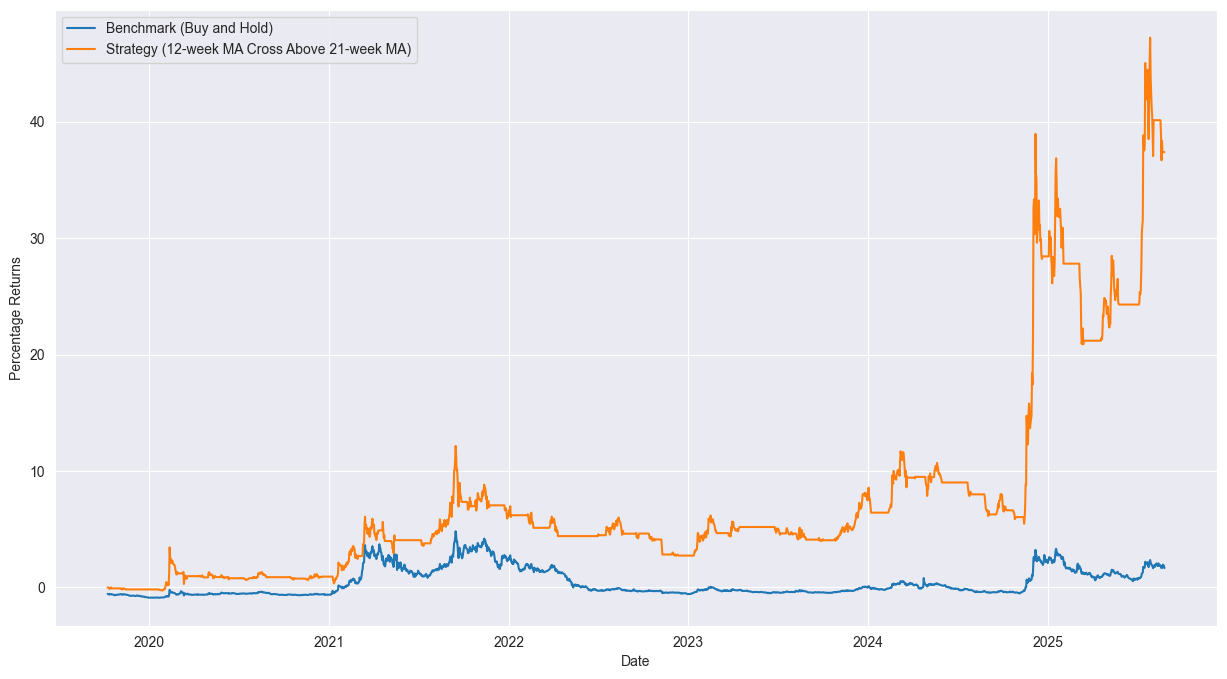

In [42]:
# Display Graph & Compare
fig = plt.figure(figsize=(15, 8))
plt.plot(hbar_yf_data["prod_benchmark"], label='Benchmark (Buy and Hold)')
plt.plot(hbar_yf_data["prod_strategy"], label='Strategy (12-week MA Cross Above 21-week MA)')
plt.xlabel('Date')
plt.ylabel('Percentage Returns')
plt.legend()
plt.show()

# Metrics

In [43]:
print(f"Benchmark Returns: {hbar_yf_data['prod_benchmark'].iloc[-1]}")
print(f"Strategy Returns: {hbar_yf_data['prod_strategy'].iloc[-1]}")

Benchmark Returns: 1.658736043929467
Strategy Returns: 37.38788795463438


In [44]:
# Calculate Sharpe Ratio
def calculate_sharpe_ratio(returns: float) -> float:
    N = 365
    rf = 0.01
    SQRTN = np.sqrt(N)
    mean = returns.mean() * N
    sigma = returns.std() * SQRTN
    sharpe = round((mean - rf) / sigma, 3)
    return sharpe

In [45]:
# Show Sharpe
bench_sharpe = calculate_sharpe_ratio(hbar_yf_data["log_returns_benchmark"].values)
strategy_sharpe = calculate_sharpe_ratio(hbar_yf_data["log_returns_strategy"].values)
print(f"Benchmark Sharpe: {bench_sharpe}")
print(f"Strategy Sharpe: {strategy_sharpe}")

Benchmark Sharpe: 0.242
Strategy Sharpe: 0.653
